# CNN  VerFruits 

**CNN Customizada**

**1-Importação de bibliotecas**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/content/dataset'):
 #   for filename in filenames:
       # print(os.path.join(dirname, filename))

In [ ]:

import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image # for displaying images
%matplotlib inline
import os

**2- Instação do Kaggle**

In [ ]:
!pip install -q kaggle

**3- Importação do Arquivo Json Kaggle**

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saulohenriaguiar","key":"f39a97212cfdbde2b816fdffcb292e24"}'}

**4- Criação pasta no drive arquivo kaggle**

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**5- Baixar o dataset direto do kaggle**

In [ ]:
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:05<00:00, 60.5MB/s]



**6- Extrai arquivos Zip(dataset)**

In [ ]:
!unzip fruits-fresh-and-rotten-for-classification.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 20

**7- Obtem os rotulos dos dados de treinamento**

In [ ]:
# Getting labels of training data
labels = os.listdir('/content/dataset/train')
labels


['rottenbanana',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'freshapples',
 'rottenoranges']

**8- Mostra de forma aleatória algumas imagens de treinamento e tambem o tamanho de cada pasta de frutas de trainamento**


 ROTTENBANANA


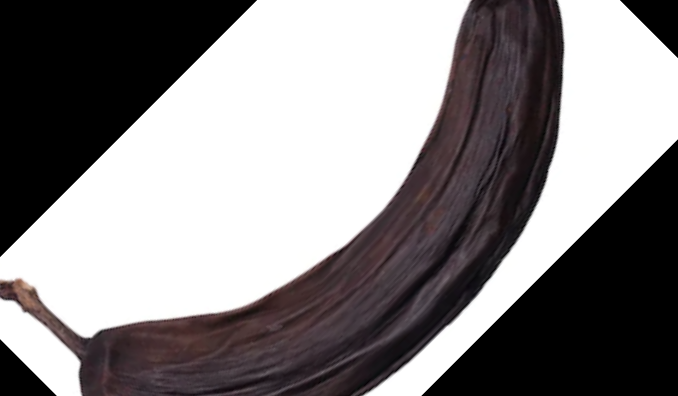

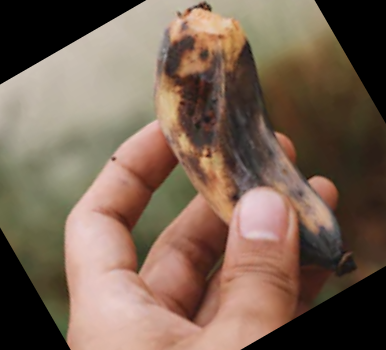

there are  2224  images in  rottenbanana class

 FRESHBANANA


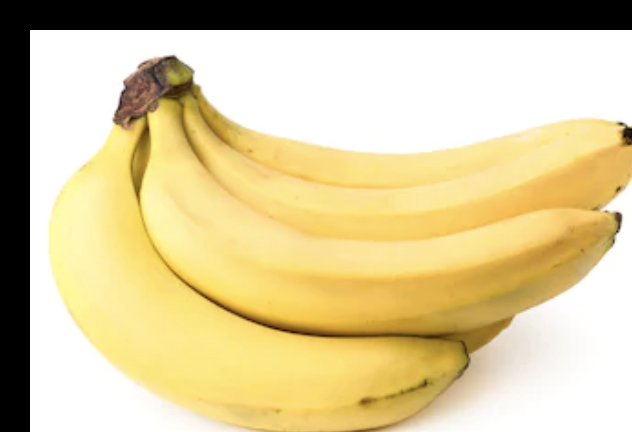

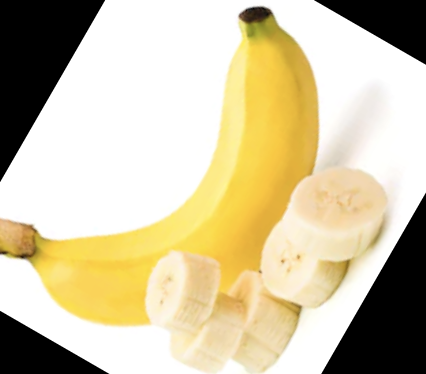

there are  1581  images in  freshbanana class

 FRESHORANGES


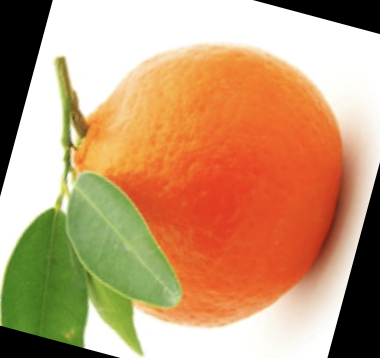

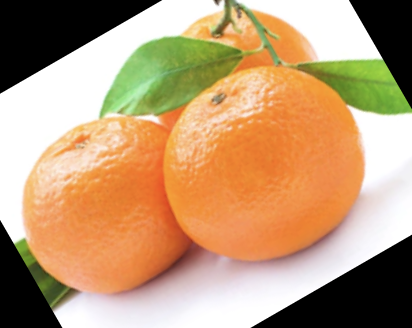

there are  1466  images in  freshoranges class

 ROTTENAPPLES


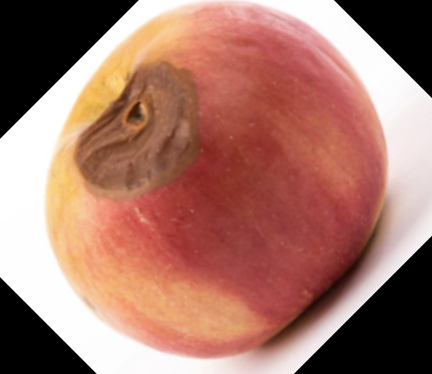

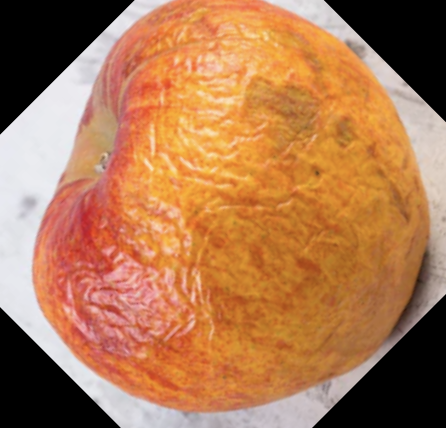

there are  2342  images in  rottenapples class

 FRESHAPPLES


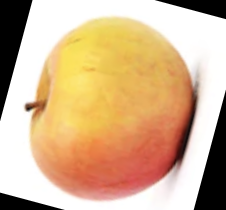

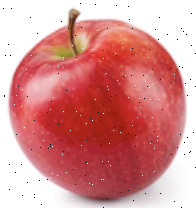

there are  1693  images in  freshapples class

 ROTTENORANGES


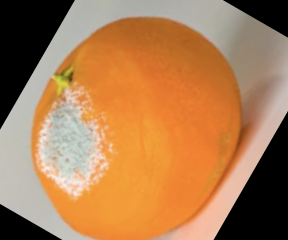

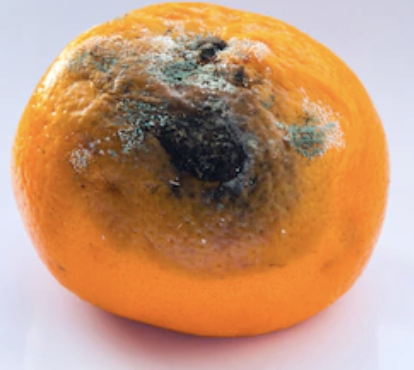

there are  1595  images in  rottenoranges class


In [ ]:
num = []

for i in labels:
  path = '/content/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

**9- Pega as imagens usando Imagegenerator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='/content/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/content/dataset/test', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 538 images belonging to 6 classes.


**10- Controindo o Modelo de CNN**

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (20,20,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

**11-Compilando o Modelo de CNN**

In [ ]:

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

**12- Sumário do módelo**

In [ ]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

**13 - Treinando o Modelo de CNN**

In [ ]:
# Train model
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=17, validation_data=vg, validation_steps=len(vg))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/17
349/349 [==============================] - 39s 110ms/step - loss: 0.8531 - accuracy: 0.6717 - val_loss: 0.5992 - val_accuracy: 0.7788
Epoch 2/17
349/349 [==============================] - 38s 110ms/step - loss: 0.4411 - accuracy: 0.8444 - val_loss: 0.3527 - val_accuracy: 0.8792
Epoch 3/17
349/349 [==============================] - 38s 110ms/step - loss: 0.3142 - accuracy: 0.8901 - val_loss: 0.2942 - val_accuracy: 0.8810
Epoch 4/17
349/349 [==============================] - 38s 108ms/step - loss: 0.2643 - accuracy: 0.9023 - val_loss: 0.2222 - val_accuracy: 0.9126
Epoch 5/17
349/349 [==============================] - 39s 111ms/step - loss: 0.2199 - accuracy: 0.9242 - val_loss: 0.2463 - val_accuracy: 0.8978
Epoch 6/17
349/349 [==============================] - 39s 111ms/step - loss: 0.1946 - accuracy: 0.9312 - val_loss: 0.2154 - val_accuracy: 0.9368
Epoch 7/17
349/349 [==============================] - 38s 109ms/step - loss: 0.1608 - accuracy: 0.9398 - val_loss: 0.1798 - val_ac

**14- Avaliando Modelo(Epocas x Perca)**

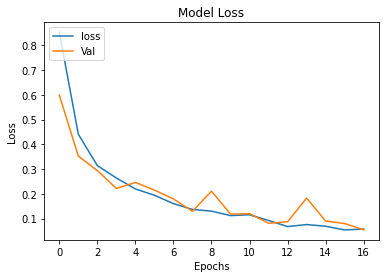

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

**15 - Avaliando Modelo(Acurácia x Epocas)**

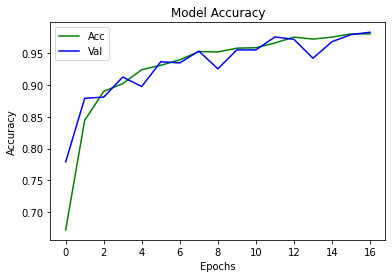

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

**16- Verificação de Overfitting**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


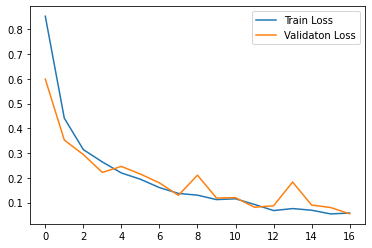

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

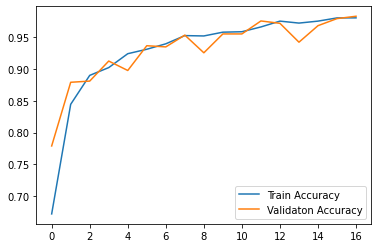

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

**16 - Geração de Modelo Preditivo**

In [ ]:
predgen = model.predict_generator(vg, steps=len(vg), verbose=1) 
pred = np.argmax(predgen,axis = 1)
y_true=vg.classes

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


22/22 [==============================] - 3s 114ms/step


**17- Geração de Matriz Confusão**

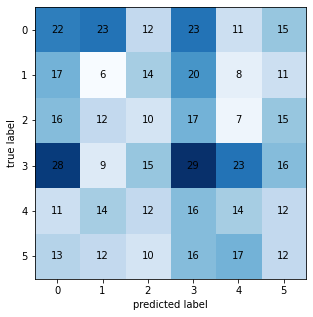

In [ ]:


from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

**18 - Métricas**

In [ ]:
def get_confusion_matrix_values(y_true, pred):
    CM = confusion_matrix(y_true, pred)
    return(CM[0][0], CM[0][1], CM[1][0], CM[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(y_true, pred)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
fallout = FP/(FP + TN)
specificity = 1 - fallout
F1  = 2*TP / (2*TP + FP + FN)
AUC = (recall+specificity)/2
MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



print('Precisão: ',precision)
print('Recall or Sensitivity: ',recall)
print('F1 score: ', F1 )
print('ROC-AUC: ', AUC)
print('MCC: ', MCC)
print('True negative rate: ', specificity)
print("False positive rate: ", fallout)



Precisão:  0.4888888888888889
Recall or Sensitivity:  0.5641025641025641
F1 score:  0.5238095238095238
ROC-AUC:  0.385499557913351
MCC:  -0.2393857457463889
True negative rate:  0.2068965517241379
False positive rate:  0.7931034482758621
